<a href="https://colab.research.google.com/github/rhiats/MovieLens-100k-dataset-Recommendation-System/blob/main/MovieLens_100k_dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Uninstall broken versions (if any)
!pip uninstall -y numpy scikit-surprise

# Install a compatible version of NumPy
!pip install numpy==1.23.5

# Install scikit-surprise with no cached wheel (to avoid mismatches)
!pip install scikit-surprise --no-cache-dir

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Successfully uninstalled numpy-1.23.5
  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.2.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505212 sha256=678521b893e69818b76f3ec0e802d587ca55efbfcc46e367c390b82af26c8f83
  Stored in directory: /tmp/pip-ephem-wheel-cache-o5t9fm5a/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset

**Load the Datset**

In [3]:
data = Dataset.load_builtin('ml-100k')
df = pd.DataFrame(data.raw_ratings, columns=["user", "item", "rating", "timestamp"])
df['rating'] = df['rating'].astype(float)
df.head()

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


,user,item,rating,timestamp
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596


**Summary Statistics**

In [4]:
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nRating stats:\n", df['rating'].describe())

Shape: (100000, 4)

Missing values:
 user         0
item         0
rating       0
timestamp    0
dtype: int64

Data types:
 user          object
item          object
rating       float64
timestamp     object
dtype: object

Rating stats:
 count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


**Distribution Rating**

<ipython-input-5-16f91609f148>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


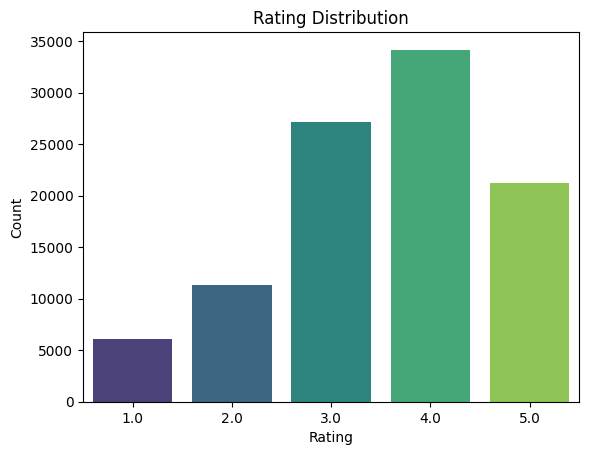

In [5]:
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Users & Items Stats**

In [6]:
n_users = df['user'].nunique()
n_items = df['item'].nunique()
print(f"Number of users: {n_users}")
print(f"Number of items (movies): {n_items}")

Number of users: 943
Number of items (movies): 1682
